In [130]:
import jax.numpy as jnp

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [131]:
def forward(x):
    return jnp.sign(x)*jnp.abs(x)**(1/3)

def inverse(x):
    return x**3

from matplotlib.scale import FuncScale

## Compare full with different levels of sparsification

In [132]:
def plot_data(full, sparsification=None):
    dp_1 = jnp.arange(1,50)*10
    dp_2 = jnp.arange(500, 1001, 100)
    dp_3 = jnp.arange(1200, 3000, 200)

    if full:
        t_1 = jnp.load("./data/full_time_10_500_10.npy")
        t_2 = jnp.load("./data/full_time_500_1001_100.npy")
        t_3 = jnp.load("./data/full_time_1200_3000_200.npy")
    else:
        t_1 = jnp.load(f"./data/sparse_time_10_500_10_{sparsification}.npy")
        t_2 = jnp.load(f"./data/sparse_time_500_1001_100_{sparsification}.npy")
        t_3 = jnp.load(f"./data/sparse_time_1200_3000_200_{sparsification}.npy")

    dp = jnp.hstack((dp_1, dp_2, dp_3))
    t = jnp.hstack((t_1, t_2, t_3))

    return dp, t

In [133]:
order = 3

In [134]:
dp_full, t_full = plot_data(True)
# t_full -= jnp.min(t_full)

lm = LinearRegression(fit_intercept=False)
lm.fit(dp_full.reshape(-1,1), t_full**(1/order))
line_full = lm.predict(dp_full.reshape(-1,1))

# print(lm.score(dp_full.reshape(-1,1), t_full**(1/order)))

In [135]:
dp_sparse_list = []
t_sparse_list = []
line_sparse_list = []

sparse_list = [0.05, 0.2, 0.4, 0.6, 0.8]

for sparse in sparse_list:
    dp_sparse, t_sparse = plot_data(False, sparse)
    # t_sparse = t_sparse - jnp.min(t_sparse)
    dp_sparse_list.append(dp_sparse)
    t_sparse_list.append(t_sparse)

    lm = LinearRegression(fit_intercept=False)
    lm.fit(dp_sparse.reshape(-1,1), t_sparse**(1/order))
    line_sparse_list.append(lm.predict(dp_sparse.reshape(-1,1)))

    # print(lm.score(dp_sparse.reshape(-1,1), t_sparse**(1/order)))

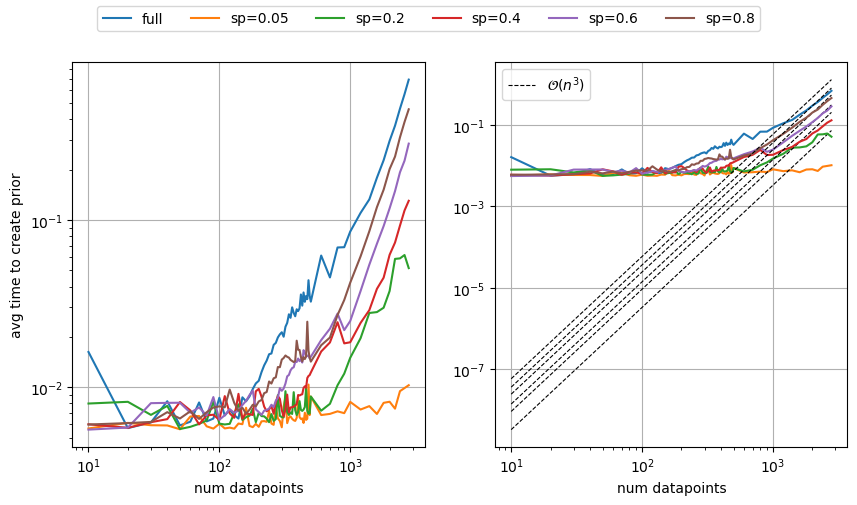

In [136]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].plot(dp_full,t_full, label="full")

for (dp, t, line, sparse) in zip(dp_sparse_list, t_sparse_list, line_sparse_list, sparse_list):
    ax[0].plot(dp,t, label=f"sp={sparse}")

# ax[0].set_yscale(FuncScale(ax, (forward, inverse)))

ax[0].set_xscale("log")
ax[0].set_yscale("log")
    

ax[1].plot(dp_full,t_full)#, label="full")

for (dp, t, line, sparse) in zip(dp_sparse_list, t_sparse_list, line_sparse_list, sparse_list):
    ax[1].plot(dp,t)#, label=f"sp={sparse}")
    ax[1].plot(dp, line**order, "k--", lw=0.8)

ax[1].plot(dp_full, line_full**order, "k--", lw=0.8, label="$\mathcal{O}(n^"+f"{order})$")

ax[1].set_xscale("log")
ax[1].set_yscale("log")

ax[0].grid()
ax[1].grid()
ax[0].set_xlabel("num datapoints")
ax[1].set_xlabel("num datapoints")
ax[1].legend()
ax[0].set_ylabel("avg time to create prior")

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncols=6)

In [137]:
dp_start = dp_full[:10]

dp_low, t_low = dp_full[:10], t_full[:10]

for dp, t in zip(dp_sparse_list, t_sparse_list):
    dp_low = jnp.hstack((dp_low, dp[:10]))
    t_low = jnp.hstack((t_low, t[:10]))

print(dp_low.shape, t_low.shape)

lm = LinearRegression()
lm.fit(dp_low.reshape(-1,1), t_low.reshape(-1,1))

pred_start = lm.predict(dp_start.reshape(-1,1))

(60,) (60,)


In [138]:
print(lm.predict(jnp.zeros((1,1))))
print(jnp.min(t_low))

[[0.00701272]]
0.0055821463


Text(0, 0.5, 'avg time to create prior')

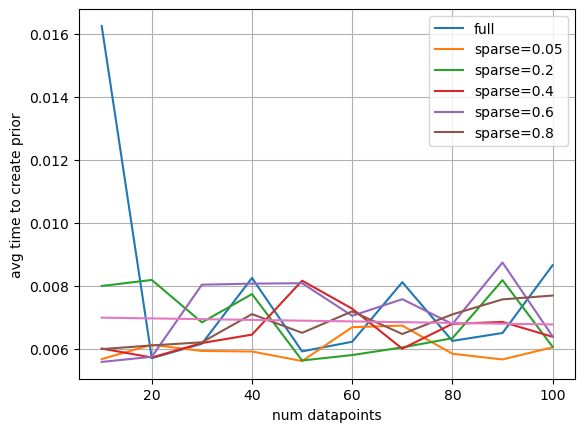

In [139]:
plt.plot(dp_full[:10],t_full[:10], label="full")

for (dp, t, line, sparse) in zip(dp_sparse_list, t_sparse_list, line_sparse_list, sparse_list):
    plt.plot(dp[:10],t[:10], label=f"{sparse=}")

plt.plot(dp_start, pred_start)

plt.grid()
plt.legend()
plt.xlabel("num datapoints")
plt.ylabel("avg time to create prior")

Text(0, 0.5, 'avg time to create prior')

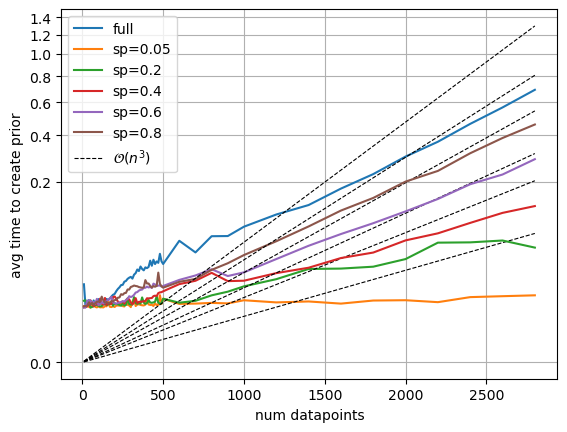

In [140]:
fig, ax = plt.subplots(1, 1)

ax.plot(dp_full,t_full, label="full")

for (dp, t, line, sparse) in zip(dp_sparse_list, t_sparse_list, line_sparse_list, sparse_list):
    ax.plot(dp,t, label=f"sp={sparse}")
    ax.plot(dp, line**order, "k--", lw=0.8)

ax.plot(dp_full, line_full**order, "k--", lw=0.8, label="$\mathcal{O}(n^"+f"{order})$")

ax.set_yscale(FuncScale(ax, (forward, inverse)))

ax.grid()
ax.set_xlabel("num datapoints")
ax.legend()

ax.set_ylabel("avg time to create prior")

# Compare how sparsification levels influence runtime for a foxed max size

In [141]:
# dp = jnp.linspace(0,1,50)
# t = jnp.load("./data/sparse_time_3000.npy")

# lm = LinearRegression()
# lm.fit(dp.reshape(-1,1), t**(1/order))
# line = lm.predict(dp.reshape(-1,1))

In [142]:
# plt.plot(dp, t)
# plt.plot(dp, line**order, "k--", lw=0.8)

# plt.yscale(FuncScale(ax, (forward, inverse)))

# plt.grid()
# plt.xlabel("sparsification")
# plt.ylabel("avg time to create prior")